In [1]:
from soft_search.data.soft_search_2022 import load_soft_search_2022, SoftSearch2022DatasetFields

data = load_soft_search_2022()

/home/eva/miniforge-pypy3/envs/eager/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
import nltk
import re

stemmer = PorterStemmer()
pattern = re.compile(r"(?u)\b\w\w+\b")

def stem(text: str):
    tokens = pattern.findall(text)
    stems = [stemmer.stem(item) for item in tokens]
    return stems

tfidf_vect = TfidfVectorizer(
    tokenizer=stem,
    strip_accents="unicode",
    stop_words="english",
    ngram_range=(1, 1),
)
X = tfidf_vect.fit_transform(data[SoftSearch2022DatasetFields.abstract_text])

X_train, X_test, y_train, y_test = train_test_split(
    X.toarray(),
    data[SoftSearch2022DatasetFields.label],
    test_size=0.4,
    stratify=data[SoftSearch2022DatasetFields.label],
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/home/eva/miniforge-pypy3/envs/eager/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/eva/miniforge-pypy3/envs/eager/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'some

((631, 7921), (422, 7921), (631,), (422,))

In [3]:
y_train.value_counts(), y_test.value_counts()

(software-not-predicted    414
 software-predicted        217
 Name: label, dtype: int64,
 software-not-predicted    277
 software-predicted        145
 Name: label, dtype: int64)

In [4]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values(by="F1 Score", ascending=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [01:34<00:00,  3.25s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.72,0.66,None,0.71,0.58
RidgeClassifier,0.72,0.66,None,0.71,0.45
LogisticRegression,0.71,0.65,None,0.70,1.04
LinearDiscriminantAnalysis,0.70,0.66,None,0.70,2.26
LinearSVC,0.69,0.68,None,0.70,8.66
NearestCentroid,0.70,0.66,None,0.70,0.32
Perceptron,0.69,0.66,None,0.69,0.35
PassiveAggressiveClassifier,0.68,0.67,None,0.69,0.39
DecisionTreeClassifier,0.68,0.63,None,0.67,0.67


In [5]:
logit_pipeline = clf.models["LogisticRegression"]
logit_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7911, 7912, 7913, 7914, 7915, 7916, 7917, 7918, 7919, 7920],
           dtype='int64', length=7921)),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Int64Index([], dtype='int64')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Int64Index([], dtype='int64'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [6]:
import pickle

with open("logit-model.pkl", "wb") as open_f:
    pickle.dump(logit_pipeline, open_f)

In [7]:
logit_model = logit_pipeline.named_steps["classifier"]
logit_model

LogisticRegression(random_state=42)

In [8]:
import pandas as pd

feature_names = tfidf_vect.get_feature_names_out()

weights = pd.DataFrame({
    "term": [
        *feature_names[logit_model.coef_[0].argsort()[:20]],
        *feature_names[logit_model.coef_[0].argsort()[-20:]],
    ],
    "coef": [
        *logit_model.coef_[0][logit_model.coef_[0].argsort()[:20]],
        *logit_model.coef_[0][logit_model.coef_[0].argsort()[-20:]],
    ],
})
weights

,term,coef
0,stem,-0.13
1,financi,-0.10
2,broad,-0.09
3,educ,-0.08
4,leverag,-0.08
5,promot,-0.08
6,scienc,-0.07
7,neon,-0.07
8,encourag,-0.07
9,practic,-0.07


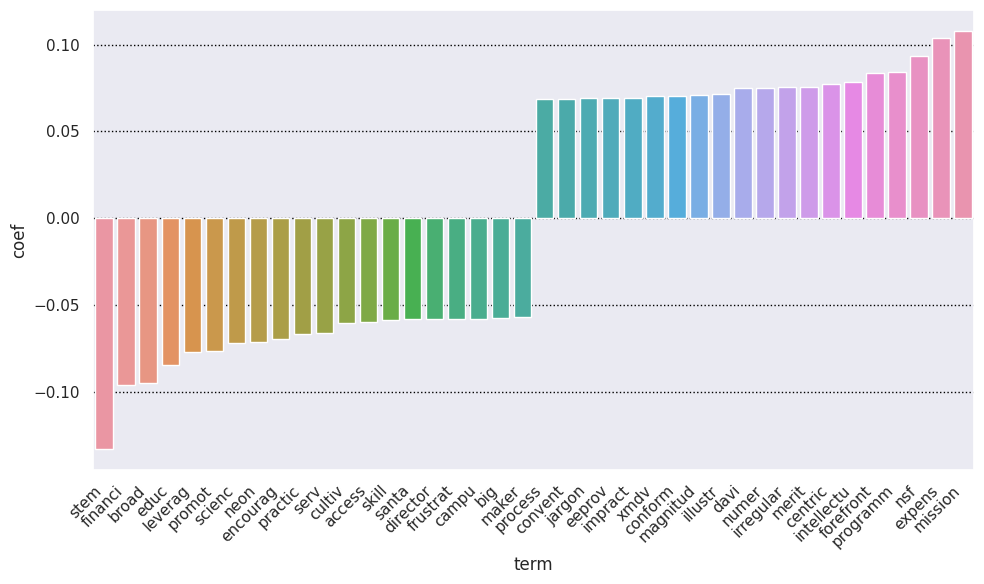

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
sns.set_theme(
    style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False}
)
sns.set_style("darkgrid", {"grid.color": "#000000", "grid.linestyle": ":"})

plt.figure(figsize=(10, 6))

sns.barplot(x=weights["term"], y=weights["coef"], )
plt.xticks(rotation=45, ha="right")
plt.tight_layout()